# Microsoft Azure Machine Learning.

The following are the step that I followed to setup Azure ML.

* Create a resource group that would hold a set of resources associated to your work.
* Setup a container registery that would be used to hold the docker image of instances after training and during deployment.
* Create a ML workspace, dedicated compute and compute clusture. Once it is created, we can start working on training and deploying our models.

The main components of Azure ML responsible for enchancing the training and deployment processes are the "Notebooks", "Automated ML", "Designer", "Experiments" and "Pipelines.
* Notebooks
    * Just like the way we work on our models in the local system, Azure ML provides a VM that enables us to run scripts/notebooks remotely. One may also use the cloud resources from the local system (while executing scripts) and vice-versa.
    * While working from the Azure ML portal, the VM comes with installed dependecies and various enviornments.
* Automated ML
    * This can be used by both coders and non-coders.
    * For non-coders, the automated ML comes with UI so that they can select their dataset and plan the experiments.
    * Automated ML also comes with python SDK that enables coders to setup their own experments.
    * Only tabular datasets are supported now.
    * High customization of models, necessity of unstructured datasets containing images and other types, etc. probably cannot be dealt with using automated ML. The hyperdrive enables us take into account these scenarios by enforcing parallel experimentation in the defined grid space.
* Pipelines
    * As the name suggestes Azure ML enables us to run python scripts as graphs; starting from image setup to deployment of a model. Designer on the other hand lets us use certain templates to draw out graphs (using UI).


# Model Development

In [1]:
import sys
sys.path.append('..')

import torch
import torch.optim as optim
import config
import numpy as np
from utils import *
from data import Data
from net import LeNet5
from train import Train
from test import Test
from config import config

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554788289/work/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


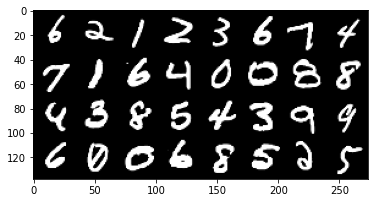

In [2]:
DEVICE = torch.device(config.device)
_data = Data(train_batch_size=config.train_batch_size, test_batch_size=config.test_batch_size)
_data.visualize()
TRAIN_LOADER, TEST_LOADER = _data.get_loaders()
MODEL = LeNet5().to(DEVICE)
OPTIMIZER = optim.SGD(MODEL.parameters(), lr=config.lr, momentum=config.momentum)
CRITERION = torch.nn.NLLLoss()
SCHEDULER = torch.optim.lr_scheduler.ReduceLROnPlateau(OPTIMIZER, 'min', patience=config.patience)

In [3]:
# run this only if you want to trin the model.
# model.pth already exists in the project root.
train_loss = Train(
    model=MODEL,
    train_loader=TRAIN_LOADER,
    optimizer=OPTIMIZER,
    criterion=CRITERION,
    scheduler=SCHEDULER,
    epochs=config.epochs,
    device=DEVICE,
    save_path=config.save_path,
    verbose=config.verbose,
    verbose_step=config.verbose_step
).train()


DEVICE - cpu || EPOCHS - 10 || LEARNING RATE - 0.001.


EPOCH - 1/10 || START AT - 05:08:40 18|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 2.10034 | Time: 25.22s.

	Train Step - 1000/1875 | Train Step Loss: 0.55117 | Time: 24.98s.

	Train Step - 1500/1875 | Train Step Loss: 0.37611 | Time: 25.81s.

	EPOCH - 1/10 || TRAIN LOSS - 0.87044 || TIME ELAPSED - 94.02s.


EPOCH - 2/10 || START AT - 05:10:14 18|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 0.25922 | Time: 23.81s.

	Train Step - 1000/1875 | Train Step Loss: 0.22336 | Time: 23.17s.

	Train Step - 1500/1875 | Train Step Loss: 0.20420 | Time: 24.02s.

	EPOCH - 2/10 || TRAIN LOSS - 0.21851 || TIME ELAPSED - 87.85s.


EPOCH - 3/10 || START AT - 05:11:42 18|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 0.16112 | Time: 22.82s.

	Train Step - 1000/1875 | Train Step Loss: 0.14944 | Time: 22.75s.

	Train Step - 1500/1875 | Train Step Loss: 0.14511 

In [3]:
image_set, label_set, pred_set, model = Test(
    model=MODEL,
    test_loader=TEST_LOADER,
    device=DEVICE,
    save_path=config.save_path,
    test_run=config.test_run
).test()

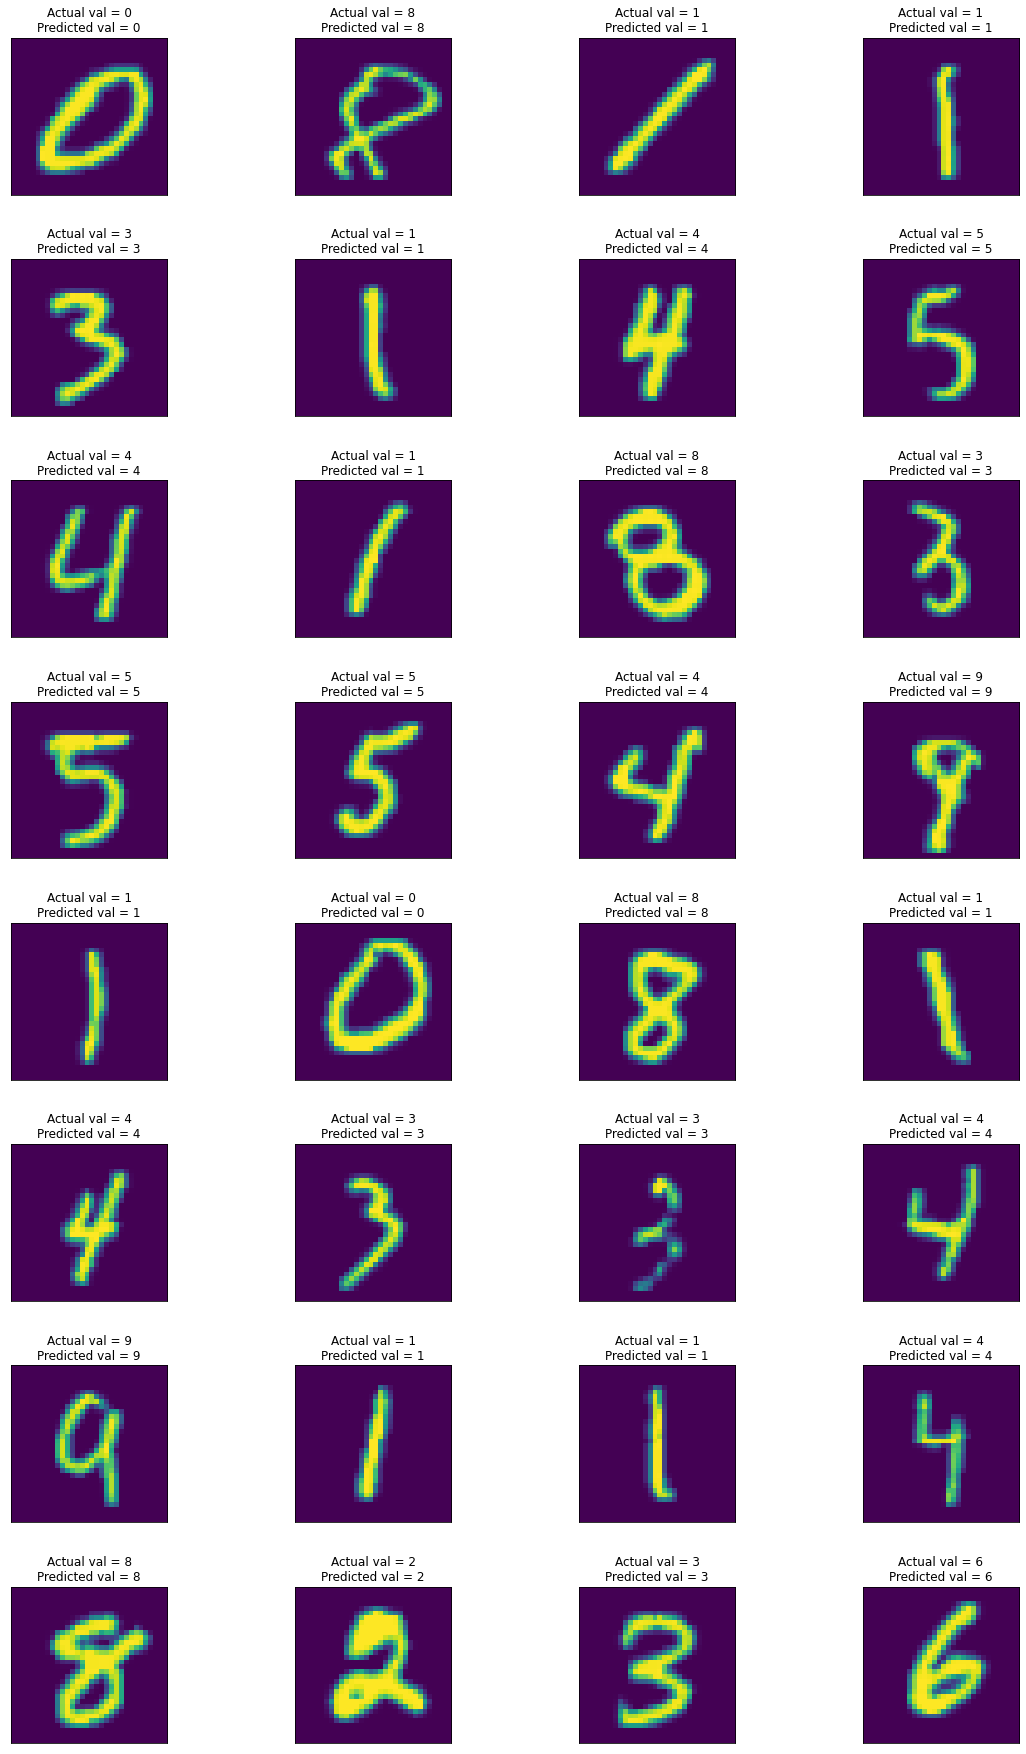

In [4]:
plot_output(image_set, label_set, pred_set)

# Model Experiment,  Hyperparameter Tuning, Deployment and ML Pipeline
* [Reference 1](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where?tabs=python)
* [Reference 2](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-azure-kubernetes-service?tabs=python)
* [Reference 3](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-create-attach-kubernetes?tabs=python)
* [Reference 4](https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.environment.environment?view=azure-ml-py)
* [Reference 5](https://docs.microsoft.com/en-us/azure/machine-learning/tutorial-1st-experiment-sdk-train)
* [Reference 6](https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.scriptrunconfig?view=azure-ml-py)
* [Reference 7](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-tune-hyperparameters)
* [Reference 8](https://github.com/Azure/MachineLearningNotebooks/tree/master/how-to-use-azureml/machine-learning-pipelines/intro-to-pipelines)
* [Video reference 1](https://www.youtube.com/watch?v=2OgBxYCnVGk)
* [Git reference 1](https://github.com/Azure/MachineLearningNotebooks/tree/master/how-to-use-azureml/ml-frameworks/pytorch/train-hyperparameter-tune-deploy-with-pytorch)

In [2]:
# importing libraries
import json
import requests
from azureml.widgets import RunDetails
from azureml.core import Workspace, Experiment, ScriptRunConfig
from azureml.core.model import Model
from azureml.core import Environment
from azureml.pipeline.core import Pipeline
from azureml.pipeline.steps import PythonScriptStep
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.model import InferenceConfig
from azureml.core.webservice import LocalWebservice, AciWebservice
from azureml.train.hyperdrive import RandomParameterSampling, BanditPolicy, HyperDriveConfig, choice, PrimaryMetricGoal
from azureml.core.runconfig import RunConfiguration
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.runconfig import DEFAULT_CPU_IMAGE

# # kubernetes
# from azureml.core.compute import AksCompute
# from azureml.core.webservice import AksWebservice

In [3]:
# connecting to the workspace
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where?tabs=python

'''
ws = Workspace(subscription_id="<subscription_id>",
               resource_group="<resource_group>",
               workspace_name="<workspace_name>")
'''
workspace = Workspace.from_config()
print(f'''Workspace name: {workspace.name}\nWorkspace region: {workspace.location}\nWorkspace subscription ID: {workspace.subscription_id}\nWorkspace resource group: {workspace.resource_group}''')

Workspace name: ml_workspace_version_1
Workspace region: centralindia
Workspace subscription ID: 2006ce9b-738e-4ab3-82ce-eb92cd6cbee2
Workspace resource group: ml_version_1


In [4]:
# defining environment
# ref - https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.environment.environment?view=azure-ml-py

env = Environment.from_pip_requirements(name="digit_recognizer_environment", file_path="./requirements.txt")

#### Experimentation and hyperparameter tuning section

In [5]:
# defining experiment instance and clusture name
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/tutorial-1st-experiment-sdk-train

clusture_name = "ML-COMPUTE-CLST"
experiment = Experiment(workspace=workspace, name="digit-recognizer-experiment-1")

In [6]:
# setting experiment config and running experiment
# ref - https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.scriptrunconfig?view=azure-ml-py

experiment_config = ScriptRunConfig(source_directory="./",
                                    script="train_cloud.py",
                                    compute_target=clusture_name,
                                    environment=env)
run = experiment.submit(experiment_config)
aml_url = run.get_portal_url()
print(aml_url)
RunDetails(run).show()

Submitting /mnt/batch/tasks/shared/LS_root/mounts/clusters/ml-workspace-compute-v1/code/Users/nikhilkb98 directory for run. The size of the directory >= 25 MB, so it can take a few minutes.


https://ml.azure.com/runs/digit-recognizer-experiment-1_1621490114_98e2521f?wsid=/subscriptions/2006ce9b-738e-4ab3-82ce-eb92cd6cbee2/resourcegroups/ml_version_1/workspaces/ml_workspace_version_1&tid=1d331154-fec8-49f7-a7ca-7c22a79641cb


_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

In [7]:
# defining hyperdrive to perform grid search and executing it
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-tune-hyperparameters

param_sampling = RandomParameterSampling({
        'learning_rate': choice(0.0001, 0.001, 0.01, 0.1, 1),
        'momentum': choice(0.9, 0.95, 1)
})
early_termination_policy = BanditPolicy(slack_factor=0.15, evaluation_interval=1, delay_evaluation=10)
hyperdrive_config = HyperDriveConfig(run_config=experiment_config,
                                     hyperparameter_sampling=param_sampling, 
                                     policy=early_termination_policy,
                                     primary_metric_name='loss',
                                     primary_metric_goal=PrimaryMetricGoal.MINIMIZE,
                                     max_total_runs=8,
                                     max_concurrent_runs=4)
hyperdrive_run = experiment.submit(hyperdrive_config)
aml_hyperdrive_url = hyperdrive_run.get_portal_url()
print(aml_hyperdrive_url)
RunDetails(hyperdrive_run).show()

https://ml.azure.com/runs/HD_7f9dd372-a2eb-467a-b2e6-25e6ea7410a3?wsid=/subscriptions/2006ce9b-738e-4ab3-82ce-eb92cd6cbee2/resourcegroups/ml_version_1/workspaces/ml_workspace_version_1&tid=1d331154-fec8-49f7-a7ca-7c22a79641cb


_HyperDriveWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO'…

In [8]:
# picking up the best model
hyperdrive_model_run = hyperdrive_run.get_best_run_by_primary_metric()
hyperdrive_model_run_metrics = hyperdrive_model_run.get_metrics()
print(f"Best model attributes: Learning rate = {hyperdrive_model_run_metrics['learning_rate']} | Momentum = {hyperdrive_model_run_metrics['momentum']} | Loss = {hyperdrive_model_run_metrics['loss'][-1]}")

Best model attributes: Learning rate = 0.001 | Momentum = 0.95 | Loss = 0.009731239302334386


#### Deployment section

In [6]:
# registering a model
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where?tabs=python

# from hyperdrive inference
# registered_model = hyperdrive_model_run.register_model(model_name = 'digit_recognizer_hyperdrive_inference', model_path = 'outputs/model.pt')

# # otherwise
registered_model = Model.register(workspace=workspace,
                                  model_name="digit_recognizer",
                                  model_path=f"./model.pth",
                                  description="A demo model to recognize digits.")

Registering model digit_recognizer


In [6]:
# defining inference configuration.
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where?tabs=python

inference_config = InferenceConfig(environment=env,
                                   source_directory="./source_dir",
                                   entry_script="./entry_point.py")

In [7]:
# defining deployment configuration
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where?tabs=python
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-azure-kubernetes-service?tabs=python
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-create-attach-kubernetes?tabs=python

# AKS (arc kubernetes services) implementation
# aks_target = AksCompute(workspace=workspace, name="mlaksv1")
# deployment_config = AksWebservice.deploy_configuration(cpu_cores=2, memory_gb=4)

# ACI implementation
# deployment_config = AciWebservice.deploy_configuration(cpu_cores=1, 
#                                                        memory_gb=1,
#                                                        description='Digit recognizer')

# local webservice
deployment_config = LocalWebservice.deploy_configuration(port=6789)

In [8]:
# deploying ML model
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where?tabs=python

deploy = Model(workspace=workspace, id=registered_model.id)
service = Model.deploy(workspace=workspace,
                        name="digit-recognizer-service-v1",
                        models=[registered_model],
                        inference_config=inference_config,
                        deployment_config=deployment_config,
                        overwrite=True)
service.wait_for_deployment(show_output=True)
print(service.get_logs())

Generating Docker build context.
2021/05/18 13:22:04 Downloading source code...
2021/05/18 13:22:05 Finished downloading source code
2021/05/18 13:22:05 Creating Docker network: acb_default_network, driver: 'bridge'
2021/05/18 13:22:06 Successfully set up Docker network: acb_default_network
2021/05/18 13:22:06 Setting up Docker configuration...
2021/05/18 13:22:06 Successfully set up Docker configuration
2021/05/18 13:22:06 Logging in to registry: mlworkspaceversion1.azurecr.io
2021/05/18 13:22:07 Successfully logged into mlworkspaceversion1.azurecr.io
2021/05/18 13:22:07 Executing step ID: acb_step_0. Timeout(sec): 5400, Working directory: '', Network: 'acb_default_network'
2021/05/18 13:22:07 Scanning for dependencies...
2021/05/18 13:22:08 Successfully scanned dependencies
2021/05/18 13:22:08 Launching container with name: acb_step_0
Sending build context to Docker daemon  66.56kB
Step 1/18 : FROM mcr.microsoft.com/azureml/intelmpi2018.3-ubuntu16.04:20210301.v1@sha256:000d6c43f606ce

In [14]:
# test deployed model
# ref - https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where?tabs=python

uri = service.scoring_uri
response = requests.get("http://localhost:6789")
print("Localhost response -> ", response)
headers = {
    "Content-Type": "application/json"
    }
data = {
    "query": "What color is the fox",
    "context": "The quick brown fox jumped over the lazy dog."
    }
data = json.dumps(data)
response = requests.post(uri, data=data, headers=headers)
print(f"URI -> {uri}")
print("URI response -> ", response.json())

Localhost response ->  <Response [200]>
URI -> http://localhost:6789/score
URI response ->  test is {'query': 'What color is the fox', 'context': 'The quick brown fox jumped over the lazy dog.'}


#### ML pipline

In [47]:
# get the compute target base on the compute clusture

clusture_name = "ML-COMPUTE-CLST"
try:
    compute_target = AmlCompute(workspace=workspace, name=clusture_name)
    print(compute_target)
    print("\nInitiated a compute target...")
except Exception as e:
    print(e)

AmlCompute(workspace=Workspace.create(name='ml_workspace_version_1', subscription_id='2006ce9b-738e-4ab3-82ce-eb92cd6cbee2', resource_group='ml_version_1'), name=ML-COMPUTE-CLST, id=/subscriptions/2006ce9b-738e-4ab3-82ce-eb92cd6cbee2/resourceGroups/ml_version_1/providers/Microsoft.MachineLearningServices/workspaces/ml_workspace_version_1/computes/ML-COMPUTE-CLST, type=AmlCompute, provisioning_state=Succeeded, location=centralindia, tags=None)

Initiated a compute target...


In [48]:
# get default blob store and upload data to the blob

def_blob_store = workspace.get_default_datastore() 
print(f"Blob store name -> {def_blob_store.name}")
def_blob_store.upload("./data", target_path="data", overwrite=True)
print("Upload call completed")

Blob store name -> workspaceblobstore
Uploading an estimated of 10 files
Uploading ./data/MNIST/raw/t10k-labels-idx1-ubyte
Uploaded ./data/MNIST/raw/t10k-labels-idx1-ubyte, 1 files out of an estimated total of 10
Uploading ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Uploaded ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz, 2 files out of an estimated total of 10
Uploading ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Uploaded ./data/MNIST/raw/t10k-images-idx3-ubyte.gz, 3 files out of an estimated total of 10
Uploading ./data/MNIST/raw/train-labels-idx1-ubyte
Uploaded ./data/MNIST/raw/train-labels-idx1-ubyte, 4 files out of an estimated total of 10
Uploading ./data/MNIST/raw/train-labels-idx1-ubyte.gz
Uploaded ./data/MNIST/raw/train-labels-idx1-ubyte.gz, 5 files out of an estimated total of 10
Uploading ./data/MNIST/processed/test.pt
Uploaded ./data/MNIST/processed/test.pt, 6 files out of an estimated total of 10
Uploading ./data/MNIST/raw/t10k-images-idx3-ubyte
Uploaded ./data/MNIST/raw/t10k-im

In [49]:
# defining ML pipeline - step 0-1 - ping

step0_1 = PythonScriptStep(name="ping_0_1_step",
                         source_directory="./pipeline_setup",
                         script_name="ping_1.py", 
                         compute_target=compute_target,
                         allow_reuse=True)
print("Step0_1 created")

Step0_1 created


In [50]:
# defining ML pipeline - step 0-2 - ping

step0_2 = PythonScriptStep(name="ping_0_2_step",
                         source_directory="./pipeline_setup",
                         script_name="ping_2.py", 
                         compute_target=compute_target,
                         allow_reuse=True)
print("Step0_2 created")

Step0_2 created


In [51]:
# defining ML pipeline - step 1 - extract libs test

pipeline_config = RunConfiguration()
pipeline_config.environment.python.conda_dependencies = CondaDependencies.create(pip_packages=['easydict', 'torch', 'numpy'], python_version='3.8.1')
step1 = PythonScriptStep(name="extract",
                         source_directory="./pipeline_setup",
                         script_name="extract.py", 
                         compute_target=compute_target,
                         allow_reuse=True,
                         runconfig=pipeline_config)
print("Step1 created")

Step1 created


In [52]:
# script graph

step1.run_after(step0_1)
step1.run_after(step0_2)
step = step1

In [53]:
# build pipeline

pipeline = Pipeline(workspace=workspace, steps=[step])
print ("Pipeline is built.")

'enabled' is deprecated. Please use the azureml.core.runconfig.DockerConfiguration object with the 'use_docker' param instead.
'enabled' is deprecated. Please use the azureml.core.runconfig.DockerConfiguration object with the 'use_docker' param instead.


Pipeline is built.


In [54]:
# validate pipeline

pipeline.validate()
print("Pipeline validation complete.")

Step extract is ready to be created [93a3e107]
Step ping_0_1_step is ready to be created [48b26085]
Step ping_0_2_step is ready to be created [66912639]
Pipeline validation complete.


In [55]:
# submit the pipeline

pipeline_run = Experiment(workspace=workspace, name='pipeline-trial').submit(pipeline, regenerate_outputs=False)
print("Pipeline is submitted for execution.")
RunDetails(pipeline_run).show()

Created step extract [93a3e107][73d8faae-05f2-458c-818e-7e281a26f6c1], (This step will run and generate new outputs)
Created step ping_0_1_step [48b26085][0e658c44-8fec-4a6a-92f4-2752815ae2cc], (This step will run and generate new outputs)
Created step ping_0_2_step [66912639][5a08c30d-8f56-4555-b6d7-9e28551b493d], (This step will run and generate new outputs)
Submitted PipelineRun 5b8cf5ba-0b0e-48b5-acc0-5df115412d64
Link to Azure Machine Learning Portal: https://ml.azure.com/runs/5b8cf5ba-0b0e-48b5-acc0-5df115412d64?wsid=/subscriptions/2006ce9b-738e-4ab3-82ce-eb92cd6cbee2/resourcegroups/ml_version_1/workspaces/ml_workspace_version_1&tid=1d331154-fec8-49f7-a7ca-7c22a79641cb
Pipeline is submitted for execution.


_PipelineWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', …